In [95]:
# test_SLM_filters.py
# This file tests the digital IIR filters defined VSLM_filter.py
#
# It compares the IIR filter to the analog filter response and plots the
# two responses with the type 1 filter tolerances
#
#

import scipy.signal as sg
import numpy as np
import matplotlib.pyplot as plt

import importlib

import VSLM_filters

In [76]:
# define poles of A weighted filter as per ANSI S1.42 annex
fa1 = 20.598997
fa2 = 107.65265
fa3 = 737.86223
fa4 = 12194.217
A1000 = 1.9997
K = (2*np.pi*fa4)**2 * (10**(A1000/20))
Z = [0, 0, 0, 0]
P = 2*np.pi*np.array([fa4, fa4, fa3, fa2, fa1, fa1])
[Ba, Aa] = sg.zpk2tf(Z, P, K)


In [54]:

f = np.logspace(1, np.log10(100000), 512)


In [139]:
fs = 96000

In [140]:
wn = f * 2 * np.pi/fs

In [141]:
# compute the frequency response of the actual a weighted filter
[wa, ha] = sg.freqs_zpk(Z, P, K, 2*np.pi*f )

In [142]:

[b, a] = vf.awt_design(fs)

In [143]:
hadb= 20*np.log10(np.abs(ha))

In [144]:
[wz, hz]=sg.freqz(b, a, wn)

In [145]:
hzdb = 20*np.log10(np.abs(hz))

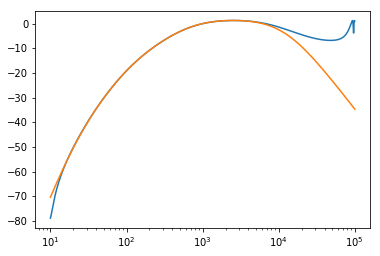

In [146]:
plt.semilogx(f, hzdb, f, hadb)
plt.show()